# Task 4-2: 이동 평균선 추가

## 과제 내용
- 주식 데이터(삼성전자, 카카오, 네이버)를 활용하여 주가 변동을 시각화
- Numpy, Matplotlib, Pandas를 활용하여 20일, 60일 이동평균선 추가 및 분석


In [6]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
def load_data():
    """데이터 로드 함수"""
    print("📊 데이터 로드 중...")
    
    csv_path = os.path.join('data', 'stock_close_prices.csv')
    
    if not os.path.exists(csv_path):
        print(f"❌ 데이터 파일이 없습니다: {csv_path}")
        print("먼저 task1_주식데이터수집.py를 실행해주세요.")
        return None
    
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)
    print(f"✅ 원본 데이터 로드 완료: {len(df)}개 데이터")
    
    # 종목별로 데이터 분리하고 Close 가격만 추출
    companies = df['company'].unique()
    print(f"📋 종목: {list(companies)}")
    
    # 각 종목의 Close 가격을 추출하여 새로운 DataFrame 생성
    close_data = {}
    for company in companies:
        company_data = df[df['company'] == company]
        close_data[company] = company_data['close'].values
    
    # DataFrame으로 변환
    data = pd.DataFrame(close_data, index=pd.to_datetime(df[df['company'] == companies[0]]['date']))
    
    print(f"✅ 데이터 전처리 완료: {len(data)}개 데이터, {len(data.columns)}개 종목")
    print(f"📅 기간: {data.index[0].strftime('%Y-%m-%d')} ~ {data.index[-1].strftime('%Y-%m-%d')}")
    
    return data


In [8]:
def calculate_moving_averages(data):
    """이동 평균선 계산 함수"""
    print("📊 이동 평균선 계산 중...")
    
    # 20일, 60일 이동 평균선 계산
    for stock in data.columns:
        data[f'{stock}_MA20'] = data[stock].rolling(window=20).mean()
        data[f'{stock}_MA60'] = data[stock].rolling(window=60).mean()
        print(f"✅ {stock} 이동평균선 계산 완료")
    
    return data


In [9]:
def plot_moving_averages(data):
    """이동 평균선 그래프 생성"""
    print("📊 이동 평균선 그래프 생성 중...")
    
    # 3개 종목을 위한 서브플롯 생성
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    stocks = data.columns[:3]  # 처음 3개 종목만 사용
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    for i, (stock, color) in enumerate(zip(stocks, colors)):
        # 종가 그래프
        axes[i].plot(data.index, data[stock], 
                    label=f'{stock} 종가', 
                    linewidth=2, 
                    color=color)
        
        # 20일 이동평균선
        axes[i].plot(data.index, data[f'{stock}_MA20'], 
                    label='20일 이동평균', 
                    linewidth=1.5, 
                    alpha=0.8,
                    linestyle='--')
        
        # 60일 이동평균선
        axes[i].plot(data.index, data[f'{stock}_MA60'], 
                    label='60일 이동평균', 
                    linewidth=1.5, 
                    alpha=0.8,
                    linestyle=':')
        
        # 그래프 설정
        axes[i].set_title(f'{stock} 주가 및 이동평균선', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('가격 (원)', fontsize=12)
        axes[i].legend(fontsize=10)
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 저장
    plot_path = os.path.join('plots', 'moving_averages.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"✅ 그래프 저장 완료: {plot_path}")
    
    # 그래프 표시
    plt.show()
    
    return plot_path


In [10]:
def analyze_trends(data):
    """추세 분석 함수"""
    print("\n📈 추세 분석 중...")
    
    stocks = data.columns[:3]  # 처음 3개 종목만 사용
    
    for stock in stocks:
        # 최근 데이터에서 추세 분석
        recent_data = data.tail(30)  # 최근 30일
        
        # 현재 가격과 이동평균선 비교
        current_price = recent_data[stock].iloc[-1]
        ma20 = recent_data[f'{stock}_MA20'].iloc[-1]
        ma60 = recent_data[f'{stock}_MA60'].iloc[-1]
        
        print(f"\n{stock} 추세 분석:")
        print(f"  현재가: {current_price:,.0f}원")
        print(f"  20일 이동평균: {ma20:,.0f}원")
        print(f"  60일 이동평균: {ma60:,.0f}원")
        
        # 추세 판단
        if current_price > ma20 > ma60:
            trend = "상승 추세"
        elif current_price < ma20 < ma60:
            trend = "하락 추세"
        else:
            trend = "횡보 추세"
        
        print(f"  추세: {trend}")
    
    return data


🚀 Task 4-2: 이동 평균선 추가
📊 데이터 로드 중...
✅ 원본 데이터 로드 완료: 2685개 데이터
📋 종목: ['삼성전자', '네이버', '카카오']
✅ 데이터 전처리 완료: 895개 데이터, 3개 종목
📅 기간: 2022-01-04 ~ 2025-09-01
📊 이동 평균선 계산 중...
✅ 삼성전자 이동평균선 계산 완료
✅ 네이버 이동평균선 계산 완료
✅ 카카오 이동평균선 계산 완료
📊 이동 평균선 그래프 생성 중...
✅ 그래프 저장 완료: plots\moving_averages.png


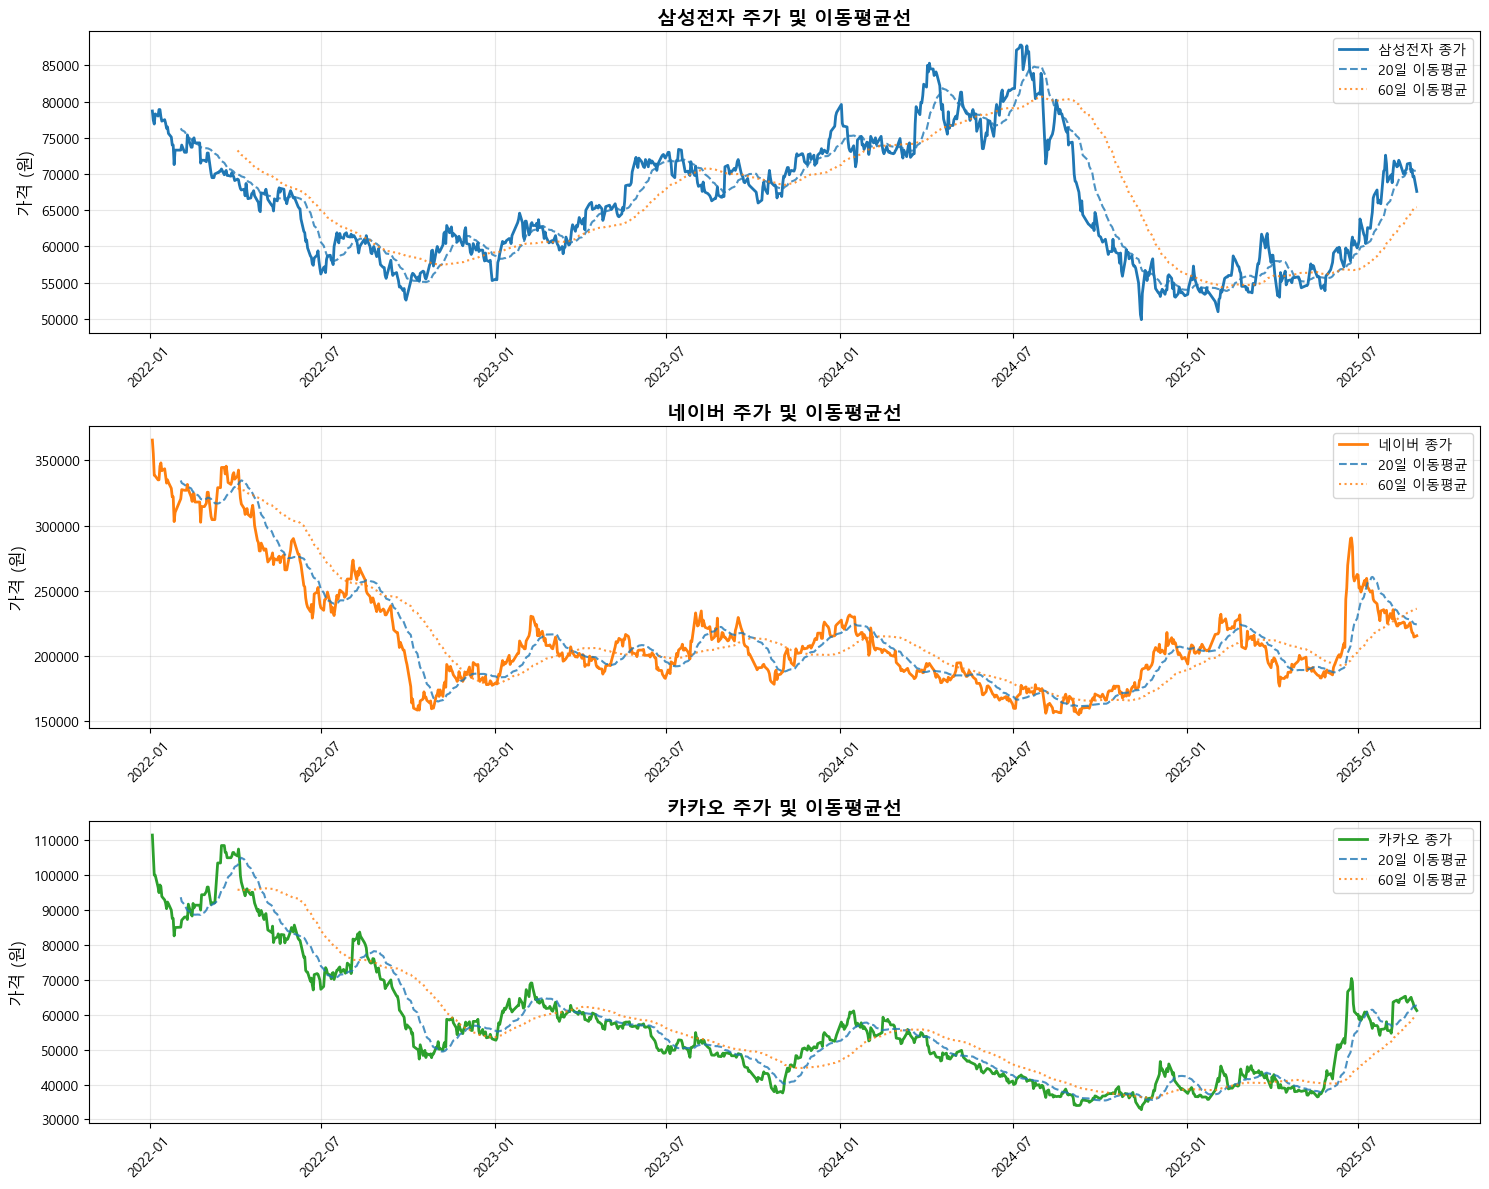


📈 추세 분석 중...

삼성전자 추세 분석:
  현재가: 67,600원
  20일 이동평균: 70,405원
  60일 이동평균: 65,418원
  추세: 횡보 추세

네이버 추세 분석:
  현재가: 215,500원
  20일 이동평균: 224,175원
  60일 이동평균: 236,157원
  추세: 하락 추세

카카오 추세 분석:
  현재가: 61,200원
  20일 이동평균: 62,710원
  60일 이동평균: 59,542원
  추세: 횡보 추세

💾 결과 저장 완료: data\stock_with_moving_averages.csv

🎉 Task 4-2 완료!
📁 결과 파일: plots\moving_averages.png


In [11]:
# 메인 실행
print("=" * 60)
print("🚀 Task 4-2: 이동 평균선 추가")
print("=" * 60)

# 1. 데이터 로드
data = load_data()

if data is not None:
    # 2. 이동 평균선 계산
    data = calculate_moving_averages(data)
    
    # 3. 이동 평균선 그래프 생성
    plot_path = plot_moving_averages(data)
    
    # 4. 추세 분석
    data = analyze_trends(data)
    
    # 5. 결과 저장
    result_path = os.path.join('data', 'stock_with_moving_averages.csv')
    data.to_csv(result_path)
    print(f"\n💾 결과 저장 완료: {result_path}")
    
    print("\n🎉 Task 4-2 완료!")
    print(f"📁 결과 파일: {plot_path}")
else:
    print("❌ 데이터 로드를 실패했습니다.")


# Task 4-2: 이동 평균선 추가

## 과제 내용
- 주식 데이터(삼성전자, 카카오, 네이버)를 활용하여 주가 변동을 시각화
- Numpy, Matplotlib, Pandas를 활용하여 20일, 60일 이동평균선 추가 및 분석


In [1]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [2]:
def load_data():
    """데이터 로드 함수"""
    print("📊 데이터 로드 중...")
    
    csv_path = os.path.join('data', 'stock_close_prices.csv')
    
    if not os.path.exists(csv_path):
        print(f"❌ 데이터 파일이 없습니다: {csv_path}")
        print("먼저 task1_주식데이터수집.py를 실행해주세요.")
        return None
    
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)
    print(f"✅ 원본 데이터 로드 완료: {len(df)}개 데이터")
    
    # 종목별로 데이터 분리하고 Close 가격만 추출
    companies = df['company'].unique()
    print(f"📋 종목: {list(companies)}")
    
    # 각 종목의 Close 가격을 추출하여 새로운 DataFrame 생성
    close_data = {}
    for company in companies:
        company_data = df[df['company'] == company]
        close_data[company] = company_data['close'].values
    
    # DataFrame으로 변환
    data = pd.DataFrame(close_data, index=pd.to_datetime(df[df['company'] == companies[0]]['date']))
    
    print(f"✅ 데이터 전처리 완료: {len(data)}개 데이터, {len(data.columns)}개 종목")
    print(f"📅 기간: {data.index[0].strftime('%Y-%m-%d')} ~ {data.index[-1].strftime('%Y-%m-%d')}")
    
    return data


In [3]:
def calculate_moving_averages(data):
    """이동 평균선 계산 함수"""
    print("📊 이동 평균선 계산 중...")
    
    # 20일, 60일 이동 평균선 계산
    for stock in data.columns:
        data[f'{stock}_MA20'] = data[stock].rolling(window=20).mean()
        data[f'{stock}_MA60'] = data[stock].rolling(window=60).mean()
        print(f"✅ {stock} 이동평균선 계산 완료")
    
    return data


In [ ]:
def plot_moving_averages(data):
    """이동 평균선 그래프 생성"""
    print("📊 이동 평균선 그래프 생성 중...")
    
    # 3개 종목을 위한 서브플롯 생성
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    stocks = ['삼성전자', '카카오', '네이버']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    for i, (stock, color) in enumerate(zip(stocks, colors)):
        # 종가 그래프
        axes[i].plot(data.index, data[stock], 
                    label=f'{stock} 종가', 
                    linewidth=2, 
                    color=color)
        
        # 20일 이동평균선
        axes[i].plot(data.index, data[f'{stock}_MA20'], 
                    label='20일 이동평균', 
                    linewidth=1.5, 
                    alpha=0.8,
                    linestyle='--')
        
        # 60일 이동평균선
        axes[i].plot(data.index, data[f'{stock}_MA60'], 
                    label='60일 이동평균', 
                    linewidth=1.5, 
                    alpha=0.8,
                    linestyle=':')
        
        # 그래프 설정
        axes[i].set_title(f'{stock} 주가 및 이동평균선', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('가격 (원)', fontsize=12)
        axes[i].legend(fontsize=10)
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 저장
    plot_path = os.path.join('plots', 'moving_averages.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"✅ 그래프 저장 완료: {plot_path}")
    
    # 그래프 표시
    plt.show()
    
    return plot_path


In [4]:
def analyze_trends(data):
    """추세 분석 함수"""
    print("\n📈 추세 분석 중...")
    
    stocks = ['삼성전자', '카카오', '네이버']
    
    for stock in stocks:
        # 최근 데이터에서 추세 분석
        recent_data = data.tail(30)  # 최근 30일
        
        # 현재 가격과 이동평균선 비교
        current_price = recent_data[stock].iloc[-1]
        ma20 = recent_data[f'{stock}_MA20'].iloc[-1]
        ma60 = recent_data[f'{stock}_MA60'].iloc[-1]
        
        print(f"\n{stock} 추세 분석:")
        print(f"  현재가: {current_price:,.0f}원")
        print(f"  20일 이동평균: {ma20:,.0f}원")
        print(f"  60일 이동평균: {ma60:,.0f}원")
        
        # 추세 판단
        if current_price > ma20 > ma60:
            trend = "상승 추세"
        elif current_price < ma20 < ma60:
            trend = "하락 추세"
        else:
            trend = "횡보 추세"
        
        print(f"  추세: {trend}")
    
    return data


In [ ]:
# 메인 실행
print("=" * 60)
print("🚀 Task 4-2: 이동 평균선 추가")
print("=" * 60)

# 1. 데이터 로드
data = load_data()

if data is not None:
    # 2. 이동 평균선 계산
    data = calculate_moving_averages(data)
    
    # 3. 이동 평균선 그래프 생성
    plot_path = plot_moving_averages(data)
    
    # 4. 추세 분석
    data = analyze_trends(data)
    
    # 5. 결과 저장
    result_path = os.path.join('data', 'stock_with_moving_averages.csv')
    data.to_csv(result_path)
    print(f"\n💾 결과 저장 완료: {result_path}")
    
    print("\n🎉 Task 4-2 완료!")
    print(f"📁 결과 파일: {plot_path}")
else:
    print("❌ 데이터 로드를 실패했습니다.")


🚀 Task 4-2: 이동 평균선 추가
📊 데이터 로드 중...
✅ 원본 데이터 로드 완료: 2685개 데이터
📋 종목: ['삼성전자', '네이버', '카카오']
✅ 데이터 전처리 완료: 895개 데이터, 3개 종목
📅 기간: 2022-01-04 ~ 2025-09-01
📊 이동 평균선 계산 중...
✅ 삼성전자 이동평균선 계산 완료
✅ 네이버 이동평균선 계산 완료
✅ 카카오 이동평균선 계산 완료


NameError: name 'plot_moving_averages' is not defined